In [1]:
from random import gauss

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed = 1234
np.random.seed(seed)

In [2]:

[gauss(0,1)+5 for i in range(1000)], [gauss(1,2)-5 for i in range(100)]

([4.848078776891597,
  5.966979208880691,
  5.699693382601626,
  5.134793816590878,
  5.577741645547797,
  5.039354670166892,
  4.841209495242794,
  5.448924290658912,
  4.641110918351275,
  4.795684184465893,
  4.562188055456198,
  4.950300689121002,
  6.671488529266047,
  3.400946343778028,
  5.361868801513172,
  7.34926762396079,
  5.0220535120099346,
  4.500585827742388,
  2.3413287666365172,
  4.901152684817044,
  4.37633151019287,
  4.346287640432885,
  2.5545706451154526,
  5.090667008046607,
  4.040726547223075,
  5.036488054821341,
  3.8677848100595975,
  6.430590743469801,
  3.9090578179337734,
  4.887749445393694,
  4.6786651711174585,
  5.648355710111258,
  7.0838377006938416,
  5.588667351015293,
  3.811360247180966,
  5.836547111894908,
  5.418826173834075,
  6.709169466790142,
  5.234399952867562,
  5.829125418411375,
  3.7462982797534057,
  5.377354387618049,
  4.2364014941662615,
  4.4967189076710845,
  6.910113742939368,
  4.1826211060883205,
  6.833377792089892,
  5.

In [3]:
bin_edges = np.linspace(-10,10,21)
bin_edges

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [4]:
hist_1, bins = np.histogram([gauss(0,2)+1 for i in range(1000)], bins=bin_edges)
hist_2, bins = np.histogram([gauss(0,2)-1 for i in range(1000)], bins=bin_edges)

In [5]:
hist_1, hist_2,bins

(array([  0,   0,   0,   2,   0,   4,  20,  45,  78, 137, 188, 199, 162,
        104,  41,  12,   6,   1,   1,   0]),
 array([  0,   0,   3,   5,  15,  40,  89, 145, 185, 205, 156,  90,  45,
         17,   4,   0,   1,   0,   0,   0]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

<Axes: >

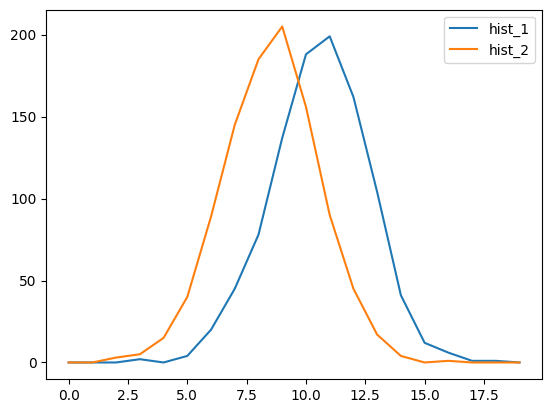

In [6]:
sim_data_df = pd.DataFrame({'hist_1':hist_1, 'hist_2':hist_2})
sim_data_df.plot()

In [7]:
import numpy as np
import pandas as pd
from random import gauss

from src.change_detector.change_detector import PDFChangeDetector
detector = PDFChangeDetector(a_memory=0.0, exp_log=False)

first_interval, second_interval = 2000, 2000
first_shift, second_shift = 5, -5

bin_edges = np.linspace(-10,10,21)

state_array = np.empty(first_interval+second_interval, dtype='uint8')
alpha_series = np.empty(first_interval+second_interval, dtype='float64')
beta_series = np.empty(first_interval+second_interval, dtype='float64')

for i in range(first_interval):
    pdf, _ = np.histogram([gauss(0,2)+first_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta  = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    print(i, ":", result.name, "\n")

for i in range(first_interval, first_interval+second_interval):
    pdf, _ = np.histogram([gauss(0,2)+second_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    print(i, ":", result.name, "\n")

0 : IN_CONTROL 

1 : IN_CONTROL 

2 : IN_CONTROL 

3 : WARNING 

4 : IN_CONTROL 

5 : WARNING 

6 : IN_CONTROL 

7 : IN_CONTROL 

8 : IN_CONTROL 

9 : IN_CONTROL 

10 : IN_CONTROL 

11 : IN_CONTROL 

12 : IN_CONTROL 

13 : IN_CONTROL 

14 : IN_CONTROL 

15 : IN_CONTROL 

16 : IN_CONTROL 

17 : IN_CONTROL 

18 : IN_CONTROL 

19 : IN_CONTROL 

20 : IN_CONTROL 

21 : IN_CONTROL 

22 : IN_CONTROL 

23 : IN_CONTROL 

24 : IN_CONTROL 

25 : IN_CONTROL 

26 : IN_CONTROL 

27 : IN_CONTROL 

28 : IN_CONTROL 

29 : IN_CONTROL 

30 : IN_CONTROL 

31 : IN_CONTROL 

32 : IN_CONTROL 

33 : IN_CONTROL 

34 : IN_CONTROL 

35 : IN_CONTROL 

36 : IN_CONTROL 

37 : IN_CONTROL 

38 : IN_CONTROL 

39 : IN_CONTROL 

40 : IN_CONTROL 

41 : IN_CONTROL 

42 : IN_CONTROL 

43 : IN_CONTROL 

44 : IN_CONTROL 

45 : IN_CONTROL 

46 : IN_CONTROL 

47 : IN_CONTROL 

48 : IN_CONTROL 

49 : IN_CONTROL 

50 : IN_CONTROL 

51 : IN_CONTROL 

52 : IN_CONTROL 

53 : IN_CONTROL 

54 : IN_CONTROL 

55 : IN_CONTROL 

56 : IN_

<Axes: >

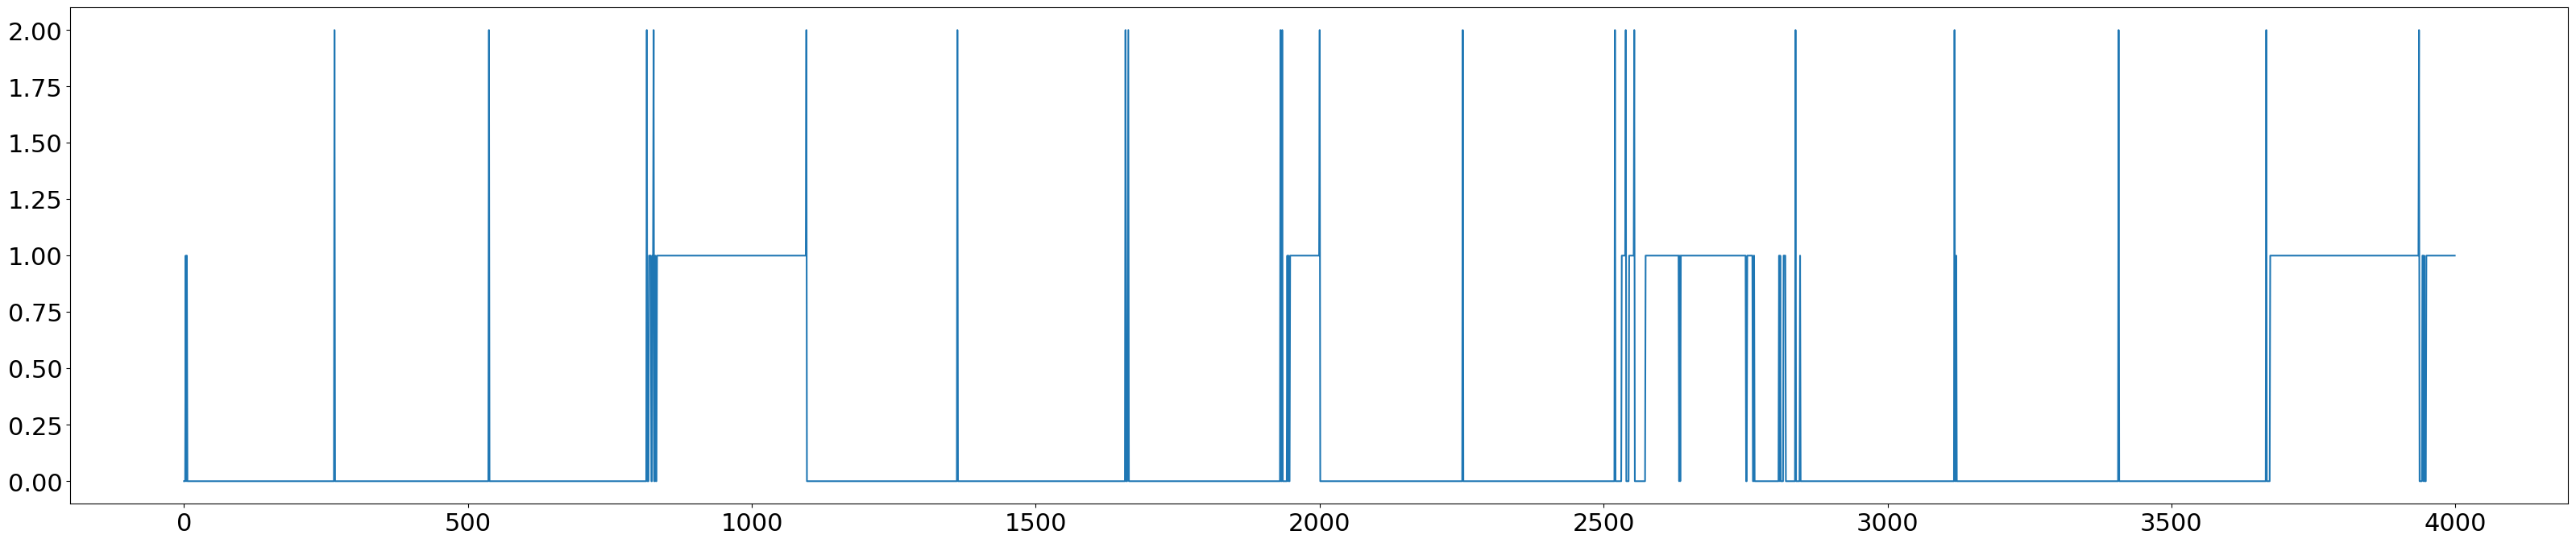

In [8]:
plt.figure()
plt.rcParams.update({'font.size': 22})

pd.Series(state_array).plot(figsize=(40,8))

<Axes: >

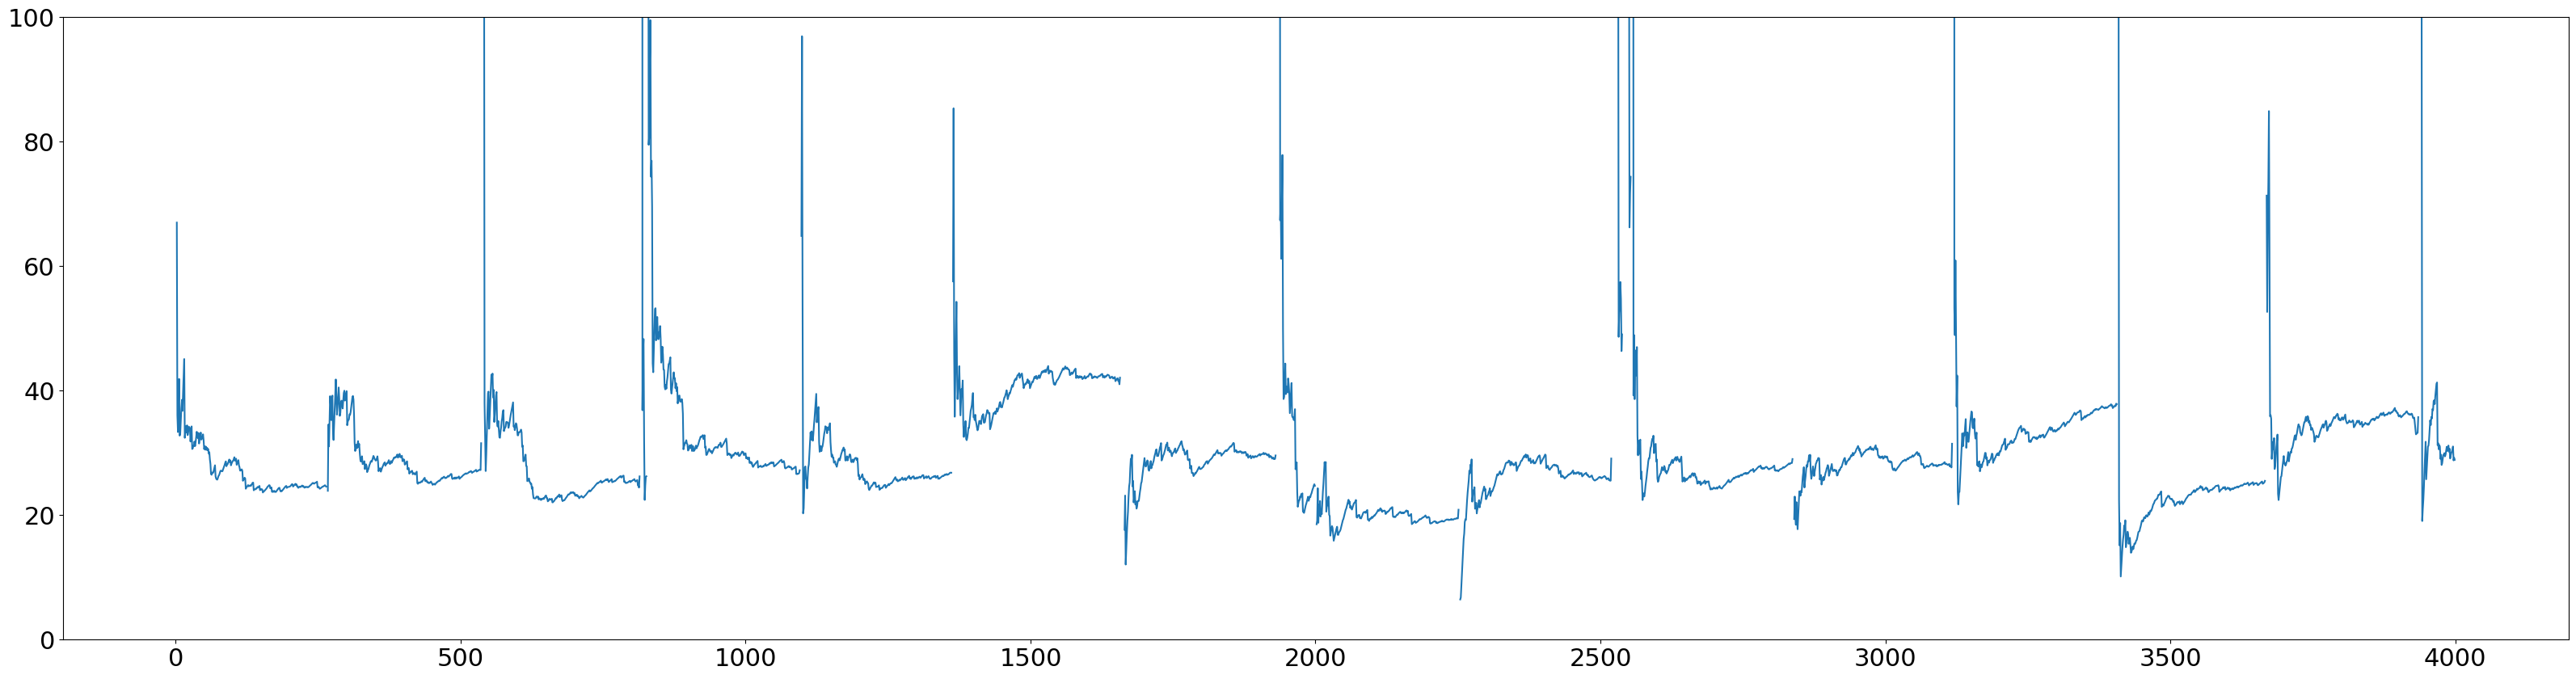

In [9]:
pd.Series(alpha_series).plot(figsize=(40,10), ylim=(0,100))

<Axes: >

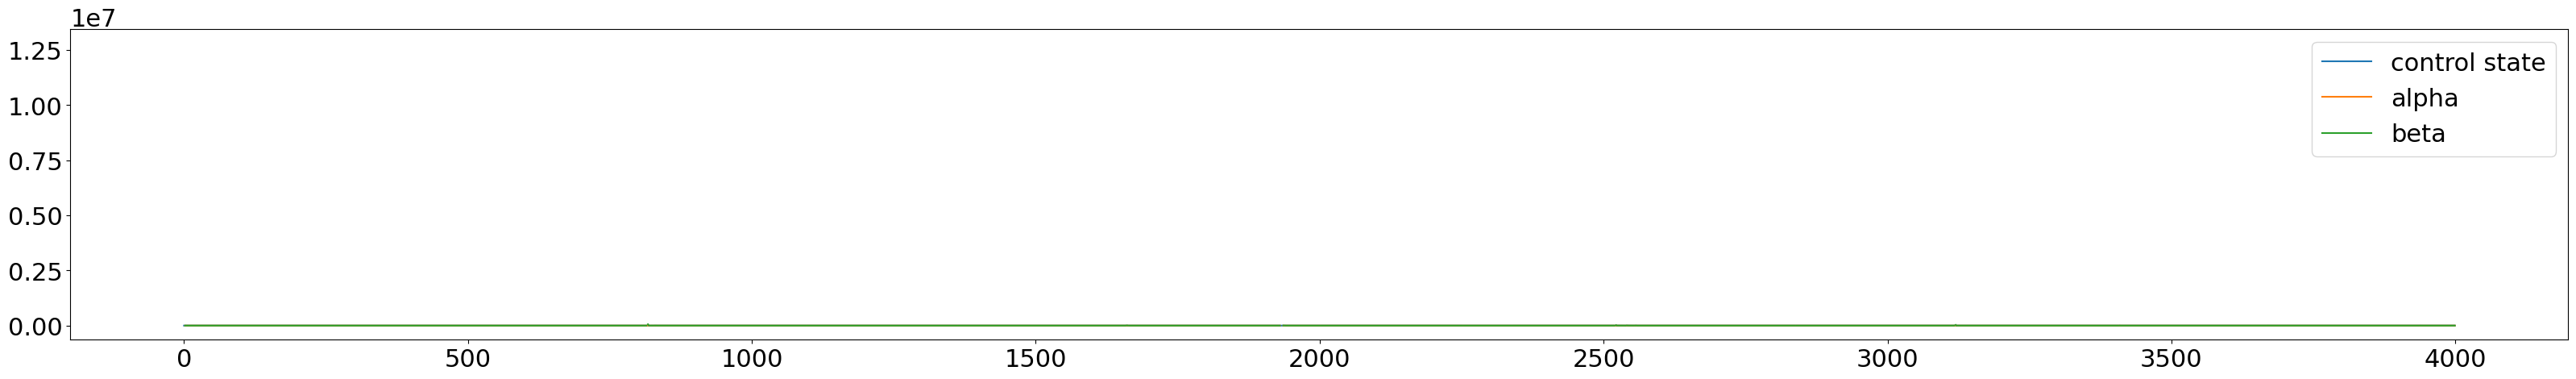

In [10]:
pd.DataFrame({'control state': state_array, 'alpha': alpha_series, 'beta': beta_series}).plot(figsize=(40,5))

In [23]:
import numpy as np
import pandas as pd
from random import gauss

from tqdm import tqdm


# Changed to log exp iter calc of parameters
from src.change_detector.change_detector import PDFChangeDetector
detector = PDFChangeDetector(a_memory=0.0)

first_interval, second_interval = 2000, 2000
first_shift, second_shift = 1, -1

bin_edges = np.linspace(-10,10,21)

state_array = np.empty(first_interval+second_interval, dtype='uint8')
alpha_series = np.empty(first_interval+second_interval, dtype='float64')
beta_series = np.empty(first_interval+second_interval, dtype='float64')

for i in tqdm(range(first_interval)):
    pdf, _ = np.histogram([gauss(0,2)+first_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta  = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

for i in tqdm(range(first_interval, first_interval+second_interval)):
    pdf, _ = np.histogram([gauss(0,2)+second_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

100%|██████████| 2000/2000 [00:08<00:00, 246.94it/s]


<Axes: >

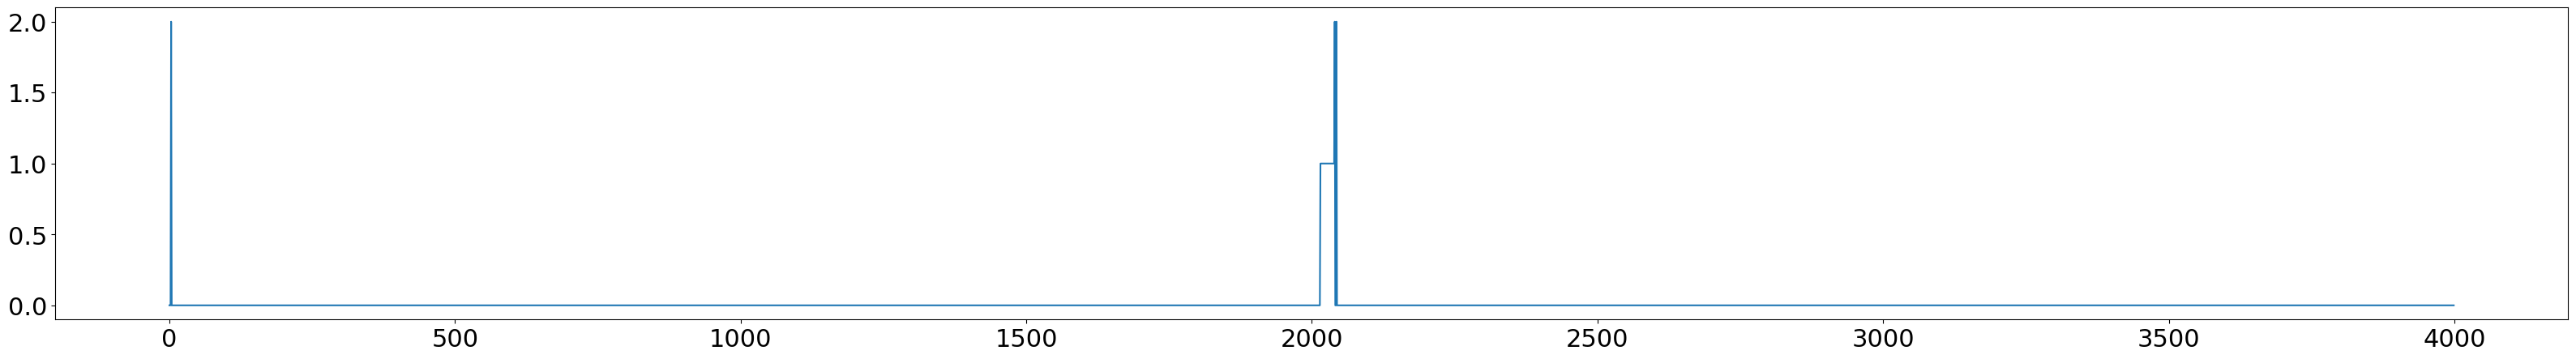

In [24]:
pd.Series(state_array).plot(figsize=(40,5))

<Axes: >

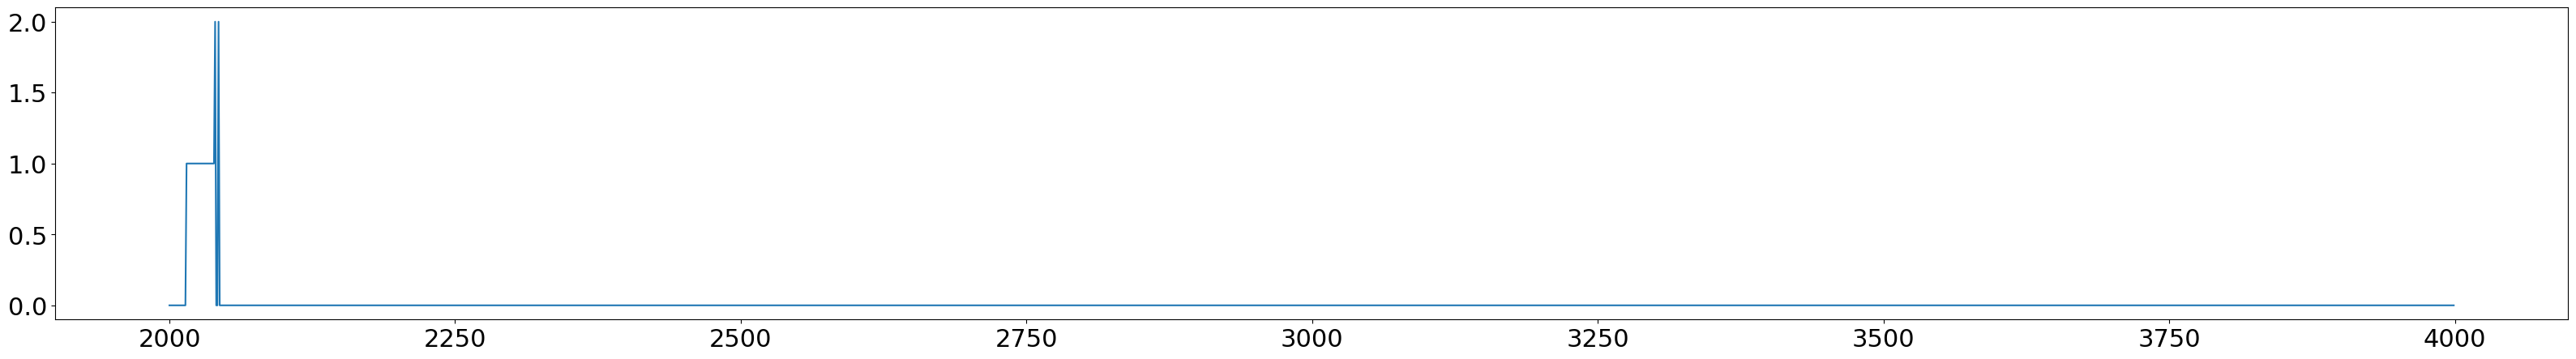

In [25]:
pl_s = pd.Series(state_array[-second_interval:])
pl_s.index=range(first_interval, first_interval+second_interval)
pl_s.plot(figsize=(40,5))

In [14]:
import numpy as np
import pandas as pd
from random import gauss

from tqdm import tqdm

from src.change_detector.change_detector import PDFChangeDetector
detector = PDFChangeDetector(a_memory=0.0)

first_interval, second_interval = 200000, 2000
first_shift, second_shift = 1, -1

bin_edges = np.linspace(-10,10,21)

state_array = np.empty(first_interval+second_interval, dtype='uint8')
alpha_series = np.empty(first_interval+second_interval, dtype='float64')
beta_series = np.empty(first_interval+second_interval, dtype='float64')

for i in tqdm(range(first_interval)):
    pdf, _ = np.histogram([gauss(0,2)+first_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta  = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

for i in tqdm(range(first_interval, first_interval+second_interval)):
    pdf, _ = np.histogram([gauss(0,2)+second_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

100%|██████████| 2000/2000 [00:05<00:00, 350.81it/s]


<Axes: >

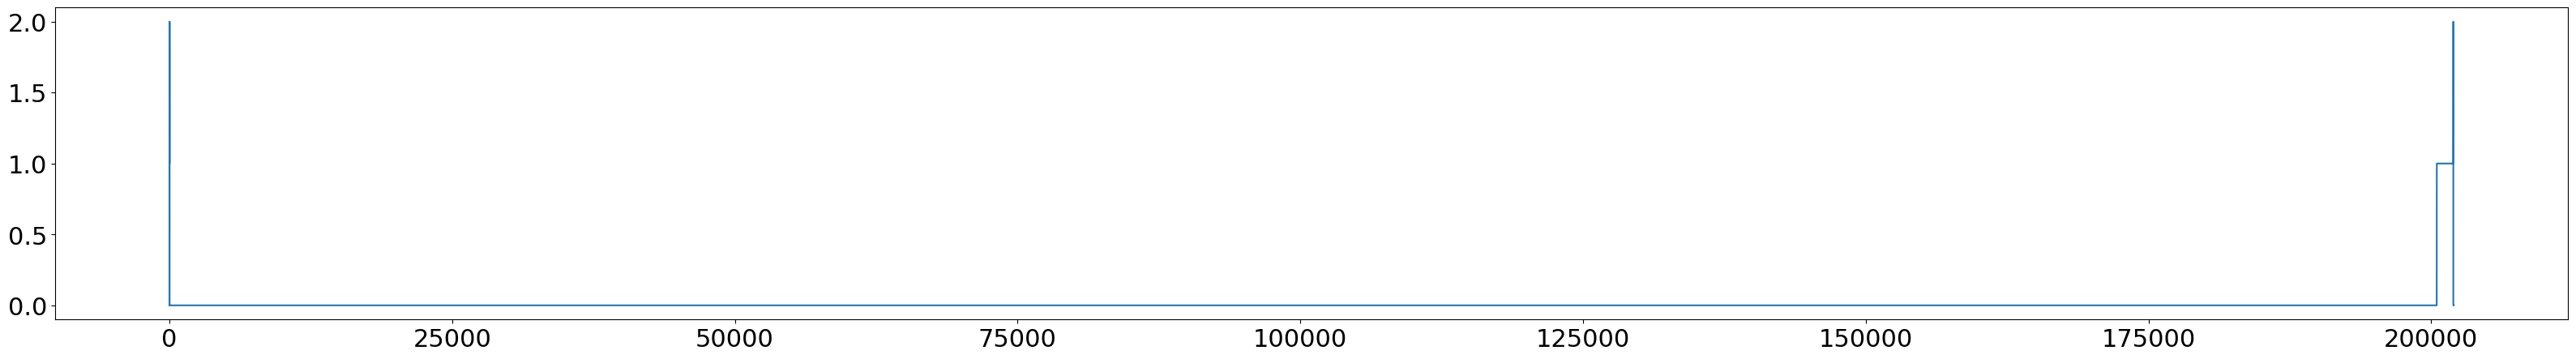

In [15]:
pd.Series(state_array).plot(figsize=(40,5))

<Axes: >

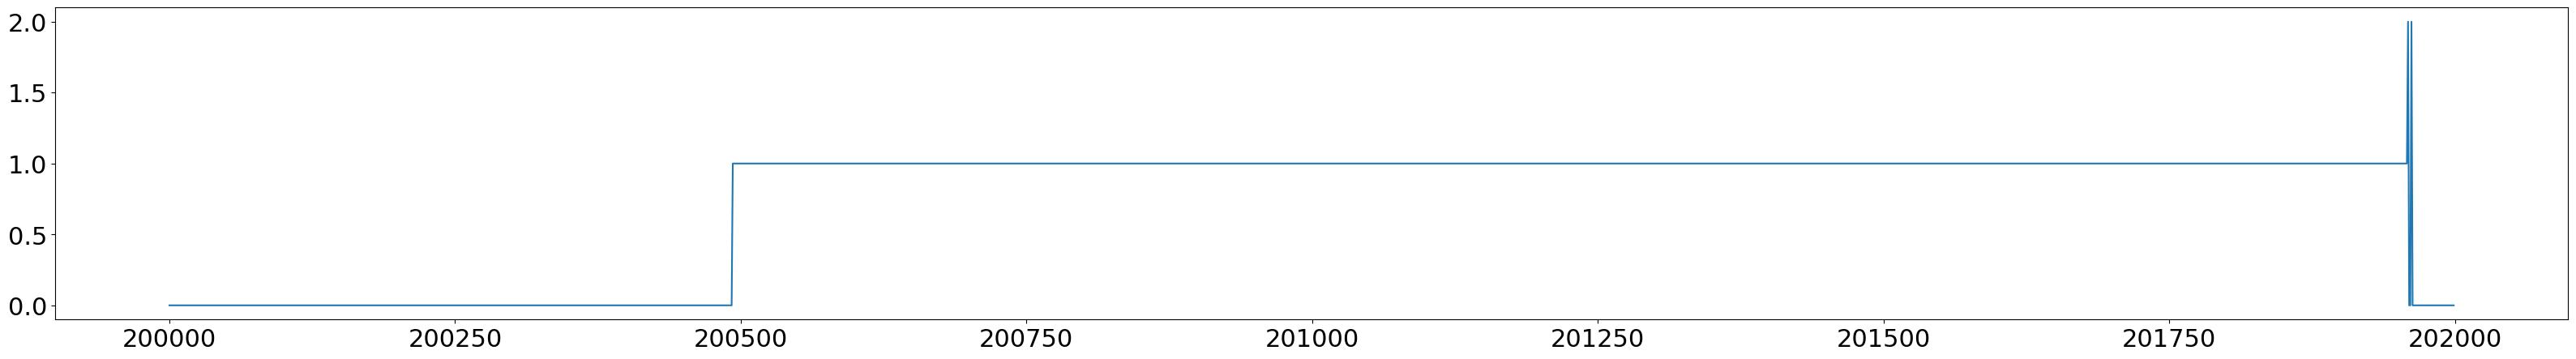

In [22]:
pl_s = pd.Series(state_array[-second_interval:])
pl_s.index=range(first_interval, first_interval+second_interval)
pl_s.plot(figsize=(40,5))

<Axes: >

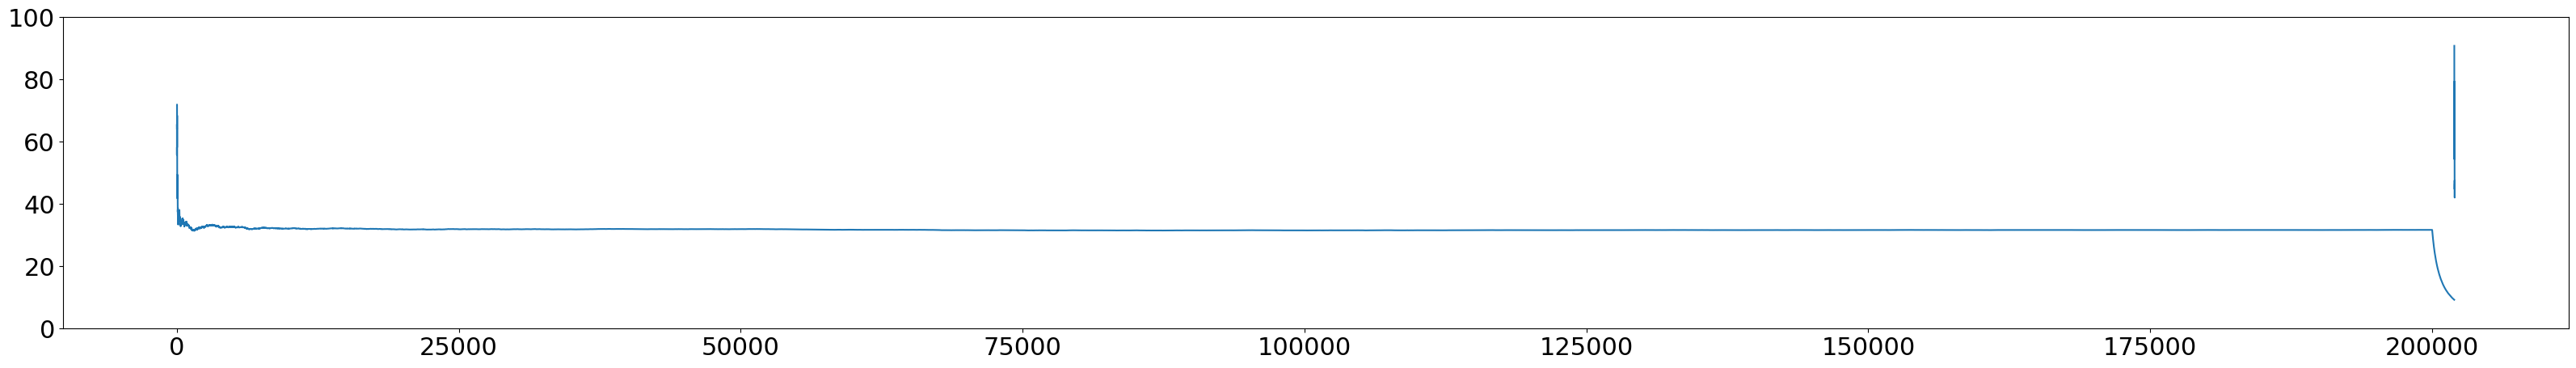

In [17]:
pd.Series(alpha_series).plot(figsize=(40,5), ylim=(0,100))

<Axes: >

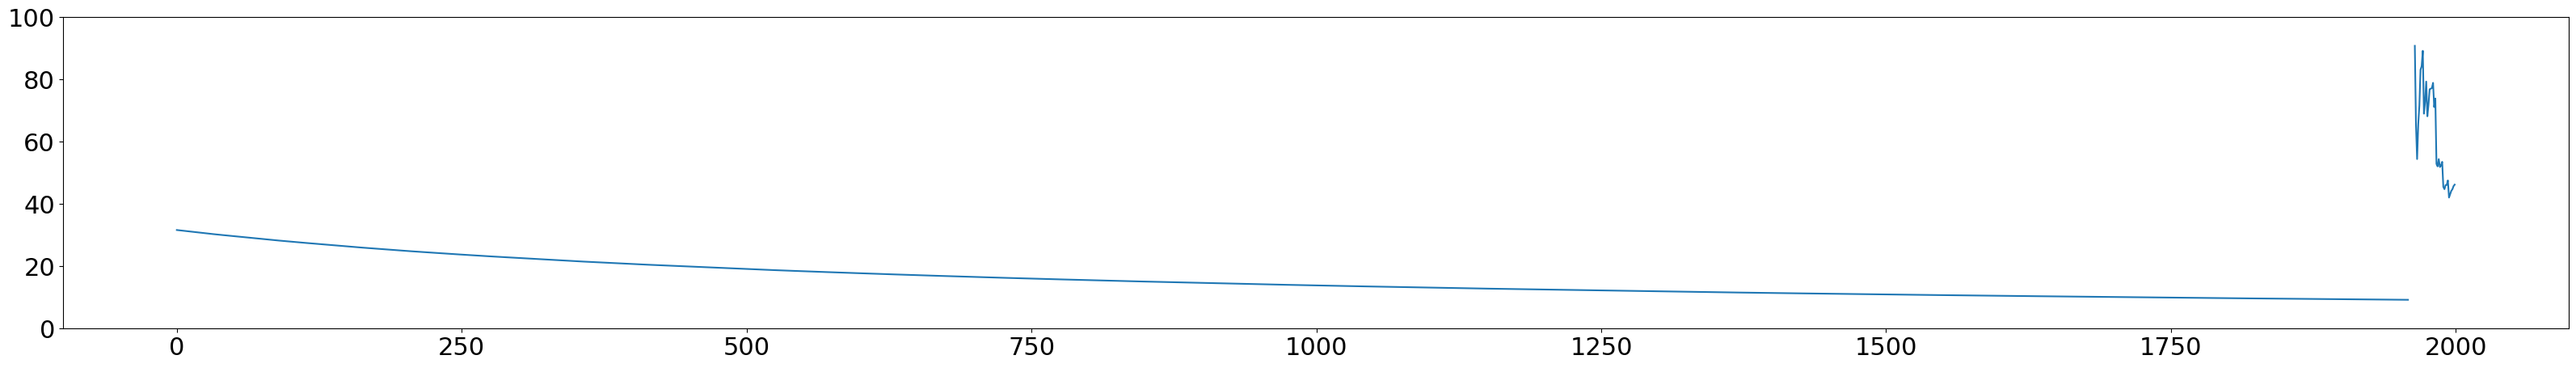

In [18]:
pd.Series(alpha_series[-second_interval:]).plot(figsize=(40,5), ylim=(0,100))

<Axes: >

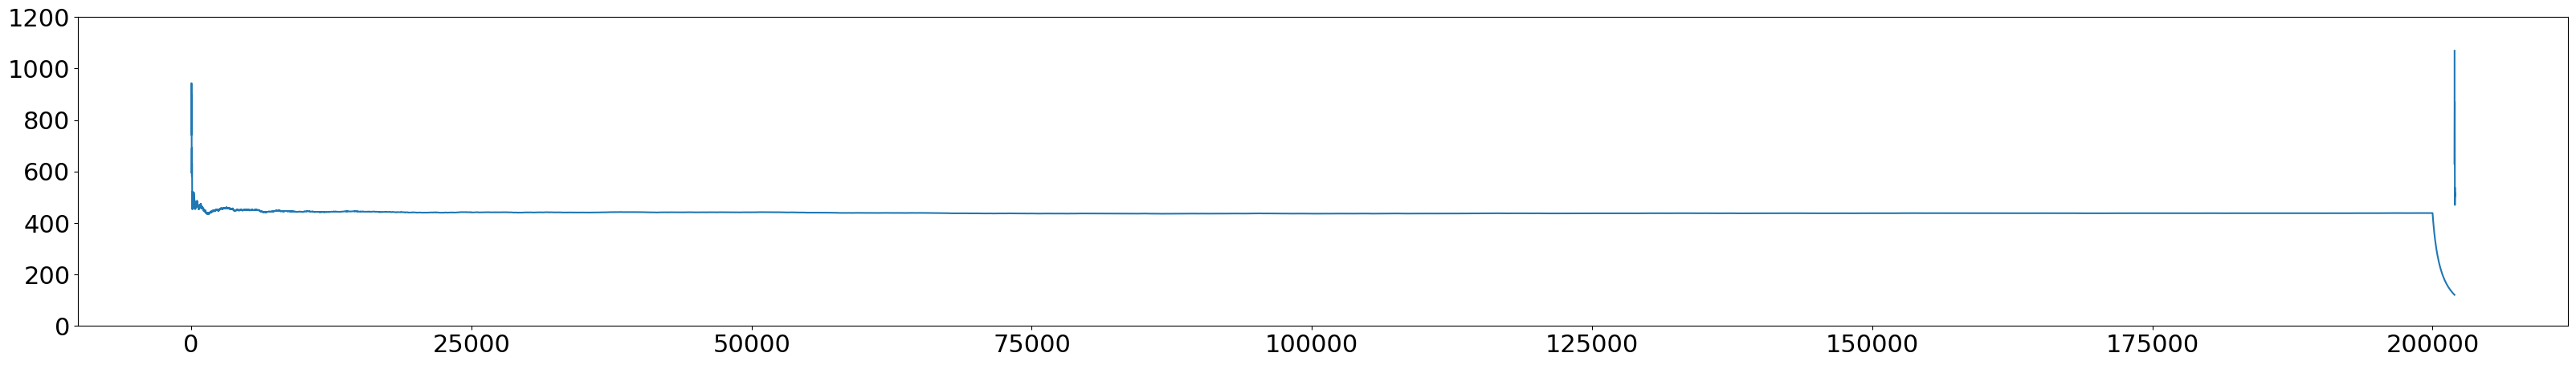

In [19]:
pd.Series(beta_series).plot(figsize=(40,5), ylim=(0,1200))

<Axes: >

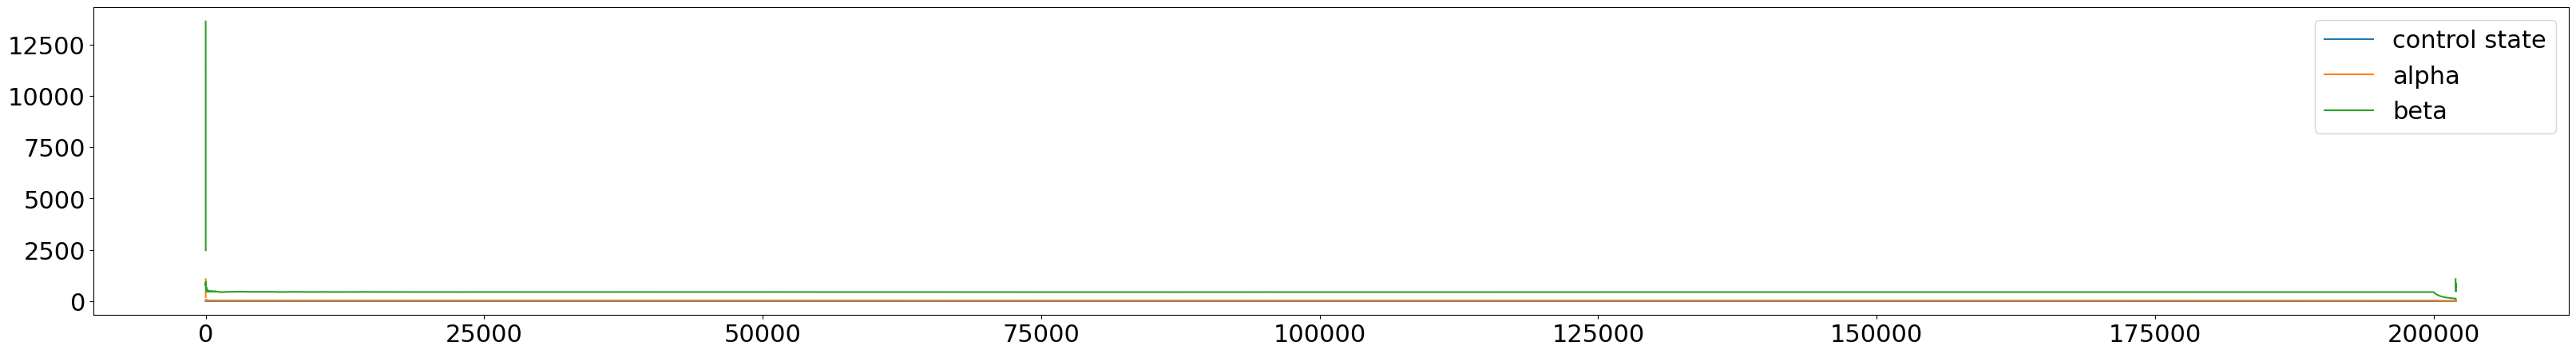

In [20]:
pd.DataFrame({'control state': state_array, 'alpha': alpha_series, 'beta': beta_series}).plot(figsize=(40,5))